Sergio Adrian Martínez Tena

# Se importan las bibliotecas necesarias

In [1]:
from AC import specialGreen,specialPurple,specialRed,createFigures
from sklearn.decomposition import PCA as pcaSklearn
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot as plt
from PIL import Image
import pandas as pd
import numpy as np
# Define color map to use
cmap = plt.get_cmap('Dark2',3)

# Se importan los datos

In [2]:
# Declare the columns names
atributes = ['Alcohol', 'Malic acid', 'Ash','Alcalinity of ash', 'Magnesium', 'Total phenols', 
             'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 
             'Hue', 'OD280/OD315 of diluted wines', 'Proline']
# Load the data with the respective columns names
dataset = pd.read_csv('wine.data', names=atributes)
# Show the first 5 rows of the data set
dataset.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 178 entries, 1 to 3
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Alcohol                       178 non-null    float64
 1   Malic acid                    178 non-null    float64
 2   Ash                           178 non-null    float64
 3   Alcalinity of ash             178 non-null    float64
 4   Magnesium                     178 non-null    int64  
 5   Total phenols                 178 non-null    float64
 6   Flavanoids                    178 non-null    float64
 7   Nonflavanoid phenols          178 non-null    float64
 8   Proanthocyanins               178 non-null    float64
 9   Color intensity               178 non-null    float64
 10  Hue                           178 non-null    float64
 11  OD280/OD315 of diluted wines  178 non-null    float64
 12  Proline                       178 non-null    int64  
dtypes: floa

## Preprocesamiento de los datos

Debido a que los índices en el conjunto de datos marcan la clase a la que pertenecen, estos se convierten a una Serie de pandas.

In [4]:
# Get the classes of every vector
dataset = dataset.reset_index()
classes = dataset['index']
dataset = dataset.drop(columns=['index'])
uniqueClasses = np.unique(classes)
# Pandas Series, classes of every vector
classes

0      1
1      1
2      1
3      1
4      1
      ..
173    3
174    3
175    3
176    3
177    3
Name: index, Length: 178, dtype: int64

Se estandarizan los datos antes de aplicar análisis de componentes principales.

In [5]:
# Standardize the data
dataset = dataset.apply(lambda x: (x - x.mean())/(x.std()), axis=0)
# Show the first 5 rows of the data set
dataset.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1.514341,-0.560668,0.231400,-1.166303,1.908522,0.806722,1.031908,-0.657708,1.221438,0.251009,0.361158,1.842721,1.010159
1,0.245597,-0.498009,-0.825667,-2.483841,0.018094,0.567048,0.731565,-0.818411,-0.543189,-0.292496,0.404908,1.110317,0.962526
2,0.196325,0.021172,1.106214,-0.267982,0.088110,0.806722,1.212114,-0.497005,2.129959,0.268263,0.317409,0.786369,1.391224
3,1.686791,-0.345835,0.486554,-0.806975,0.928300,2.484437,1.462399,-0.979113,1.029251,1.182732,-0.426341,1.180741,2.328007
4,0.294868,0.227053,1.835226,0.450674,1.278379,0.806722,0.661485,0.226158,0.400275,-0.318377,0.361158,0.448336,-0.037767


# Función de análisis de componentes principales

Función utilizando NumPy y multiplicación de matrices.

In [7]:
def PCA(data:'Numpy array or Pandas DataFrame', k:'First principal components'=2, 
        plotRanking=False, frame=False, showPCs=False):
    # k = 'all' means using all principal components
    if k == 'all':
        k = data.shape[1]
    # Calculate the covariance matrix
    cov = np.cov(data, rowvar=False)
    # Calculate the eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eig(cov)
    eigenvalues = eigenvalues/eigenvalues.sum()
    # Make ranking with eigenvalues
    rank = sorted(range(eigenvalues.size), key=lambda k: eigenvalues[k], reverse=True)
    # Sort arrays by the rank
    eigenvalues = eigenvalues[rank]
    eigenvectors =  eigenvectors[:,rank]
    # If the flag is true plot every principal component
    if plotRanking:
        # Plot the the ranking of every vector k
        ax = createFigures(figsize=(18,5))
        pcs = eigenvalues[:k]
        n = pcs.size
        ax.bar(range(n), pcs, color=specialGreen, alpha=0.5, label='Explained Variance of $PC_i$');
        cdf = np.cumsum(pcs)
        # If the flag is True show the other components on the graph
        if showPCs:
            n = eigenvalues.size
            zeros = np.zeros((k))
            ax.bar(range(n), np.concatenate((zeros,eigenvalues[k:])), color=specialPurple, alpha=0.5);
        if n < 15:
            ax.set_xticks(range(n), labels=[f'$PC_{{{i+1}}}$' for i in range(n)])
            ax.plot(range(cdf.size), cdf, 'o-', color=specialRed, label=f'Cumulative Variance: {round(pcs.sum(),3)}');
        else:
            ax.plot(range(cdf.size), cdf, '-', color=specialRed, label=f'Cumulative Variance: {round(pcs.sum(),3)}');
        ax.set_ylabel('Portion of Variance');
        ax.set_xlabel('Principal Components');
        ax.set_title('Explained variance as a function of the number of dimensions', fontsize=16, fontweight='bold')
        ax.legend(fontsize=14)
    # Matrix containing the first k principal components  
    w = eigenvectors[:,:k]
    # Projecting the data set down to d dimensions 
    dataProj = np.dot(data,w)
    # Return a new DataFrame projected into the first k principal components if frame is True
    if frame:
        return pd.DataFrame(dataProj, columns=[f'PC{i+1}' for i in range(k)]), w  
    else:
        return dataProj, w

Función utilizando la biblioteca scikit-learn.

In [8]:
def PCAsklearn(data, k=2, plotRanking=False, frame=True):
    pca = pcaSklearn(n_components=k)
    pca.fit(data)
    pcs = pca.explained_variance_ratio_
    n = pcs.size
    # If the flag is true plot every principal component
    if plotRanking:
        # Plot the the ranking of every vector k
        ax = createFigures(figsize=(18,5))
        ax.bar(range(n), pcs, color=specialGreen, alpha=0.5, label='Explained Variance of $PC_i$')
        cdf = np.cumsum(pcs)
        if n < 15:
            ax.set_xticks(range(n), labels=[f'$PC_{{{i+1}}}$' for i in range(n)])
            marker = '-o'
        else:
            marker = '-'
        ax.plot(range(cdf.size), cdf, marker, color=specialRed, label=f'Cumulative Variance: {round(pcs.sum(),3)}');
        ax.set_ylabel('Portion of Variance');
        ax.set_xlabel('Principal Components');
        ax.legend(fontsize=14)
    # Matrix containing the first k principal components  
    w = pca.components_.T
    # Projecting the data set down to d dimensions 
    dataProj = pca.transform(data)
    # Return a new DataFrame projected into the first k principal components if frame is True
    if frame:
        return pd.DataFrame(dataProj, columns=[f'PC{i+1}' for i in range(n)]), w  
    else:
        return dataProj, w

# Resultados

## Utilizando Numpy

,PC1,PC2,PC3,PC4,PC5,PC6
0,-3.307421,-1.439402,0.165273,-0.215025,-0.691093,-0.223250
1,-2.203250,0.332455,2.020757,-0.290539,0.256930,-0.924512
2,-2.509661,-1.028251,-0.980054,0.722863,0.250327,0.547731
3,-3.746497,-2.748618,0.175696,0.566386,0.310964,0.114109
4,-1.006070,-0.867384,-2.020987,-0.408613,-0.297618,-0.405376
...,...,...,...,...,...,...
173,3.361043,-2.210055,0.341606,1.055549,0.572549,-1.105669
174,2.594637,-1.752286,-0.206997,0.348513,-0.254346,-0.026391
175,2.670307,-2.753133,0.938295,0.311157,-1.267779,0.272300
176,2.380303,-2.290884,0.549147,-0.686348,-0.811666,1.175467


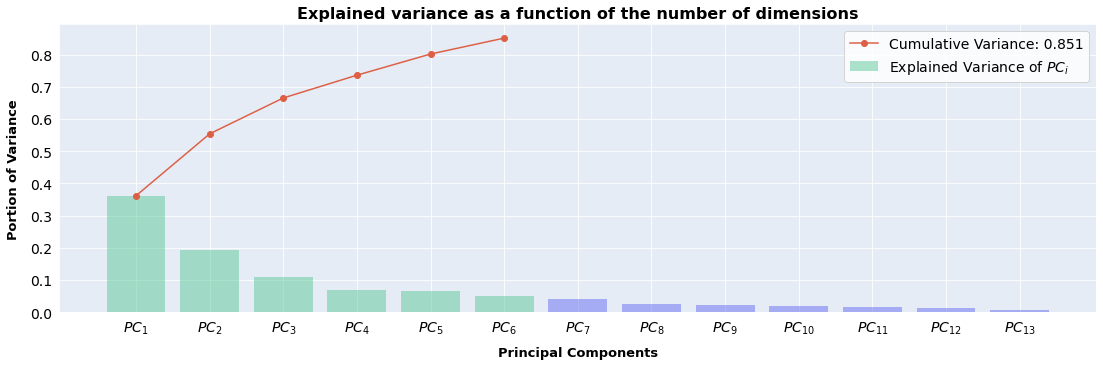

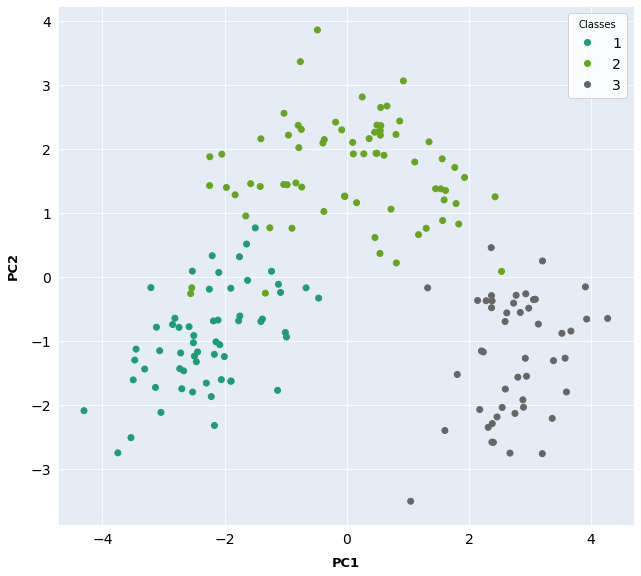

In [9]:
# New data with the 4 first principal components
newData, w = PCA(dataset, k=6, plotRanking=True, frame=True, showPCs=True)
# The graph shows the first two principal componentes
ax = createFigures(figsize=(10,9))
scatter = ax.scatter(x=newData['PC1'], y=newData['PC2'], c=classes, cmap=cmap);
ax.legend(scatter.legend_elements()[0], uniqueClasses, fontsize=14, title='Classes');
ax.set_xlabel('PC1');
ax.set_ylabel('PC2');
# Show the values of the components
newData

## Utilizando scikit-learn.

,PC1,PC2
0,3.307421,-1.439402
1,2.203250,0.332455
2,2.509661,-1.028251
3,3.746497,-2.748618
4,1.006070,-0.867384
...,...,...
173,-3.361043,-2.210055
174,-2.594637,-1.752286
175,-2.670307,-2.753133
176,-2.380303,-2.290884


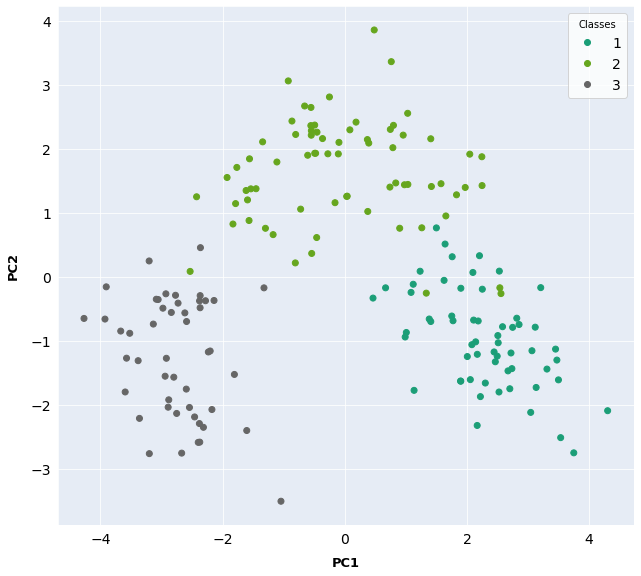

In [10]:
# New data with the 4 first principal components
newData, w = PCAsklearn(dataset, k=2, plotRanking=False, frame=True)
# The graph shows the first two principal componentes
ax = createFigures(figsize=(10,9))
scatter = ax.scatter(x=newData['PC1'], y=newData['PC2'], c=classes, cmap=cmap);
ax.legend(scatter.legend_elements()[0],uniqueClasses, fontsize=14, title='Classes');
ax.set_xlabel('PC1');
ax.set_ylabel('PC2');
# Show the values of the components
newData